In [1]:
import pandas as pd
import numpy as np
from scipy.stats import kstest,ttest_ind, ks_2samp
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 7, 'ytick.major.width': 1.5, 'ytick.major.size': 7})
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
def save_pdf(save_file, fig):
    pdf = PdfPages(save_file)
    pdf.savefig(fig, bbox_inches='tight')
    pdf.close()
    return

In [3]:
cohort_file = "/data6/deepro/ukb_bmi/0_data_preparation_and_download/phenotype/data/bmi_processed/british/test_cohort_bmi.csv.gz"
combo_samples_file = "/data6/deepro/ukb_bmi/3_characterization/data/combos_in_cohort/british/BH_001/test_cohort.csv"

In [4]:
cohort_df = pd.read_csv(cohort_file, usecols=["sample_names", "bmi", "bmi_prs"])

In [5]:
combo_samples_df = pd.read_csv(combo_samples_file)

In [6]:
all_combo_samples = set("|".join(combo_samples_df.combo_samples.values).split("|"))

In [7]:
cohort_df["combo_carriers"] = cohort_df.sample_names.astype(str).isin(all_combo_samples)

# BMI comparison between individuals with and without the combinations in a non-white british cohort

In [8]:
combo_hit_pheno = cohort_df.loc[cohort_df.combo_carriers==True]
non_combo_hit_pheno = cohort_df.loc[cohort_df.combo_carriers==False]

ttest_ind(non_combo_hit_pheno.bmi, combo_hit_pheno.bmi, alternative="less"), ks_2samp(combo_hit_pheno.bmi, non_combo_hit_pheno.bmi, alternative="less")

(TtestResult(statistic=-11.700860883292856, pvalue=6.836732438573906e-32, df=59016.0),
 KstestResult(statistic=0.07680977722230231, pvalue=9.81347100791064e-20, statistic_location=26.8738, statistic_sign=-1))

In [9]:
ttest_pval = ttest_ind(non_combo_hit_pheno.bmi, combo_hit_pheno.bmi, alternative="less").pvalue

In [10]:
combo_hit_pheno.bmi.describe()

count    3972.000000
mean       28.412557
std         5.348140
min        16.080400
25%        24.802700
50%        27.611400
75%        31.078350
max        68.129900
Name: bmi, dtype: float64

In [11]:
non_combo_hit_pheno.bmi.describe()

count    55046.000000
mean        27.454781
std          4.954762
min         13.912300
25%         24.050900
50%         26.759150
75%         30.023800
max         68.319400
Name: bmi, dtype: float64

In [12]:
non_combo_hit_pheno.bmi_prs.describe()

count    52673.000000
mean        -0.084470
std          0.994415
min         -4.603130
25%         -0.758060
50%         -0.086184
75%          0.584465
max          4.331770
Name: bmi_prs, dtype: float64

In [13]:
combo_hit_pheno.bmi_prs.describe()

count    3957.000000
mean       -0.040431
std         0.998207
min        -3.685680
25%        -0.706591
50%        -0.031089
75%         0.634259
max         3.271170
Name: bmi_prs, dtype: float64

/tmp/ipykernel_99282/1508290031.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Non\ncarrier", "Carrier"], rotation=45, ha="center", fontsize=14)


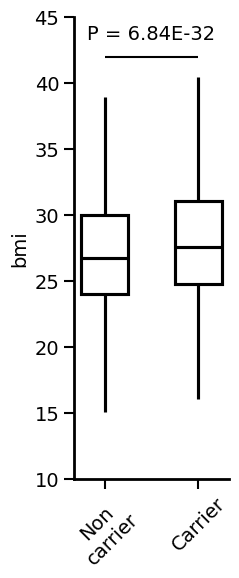

In [14]:
boxdf = cohort_df

# Define Canvas
fig,ax = plt.subplots(1, 1, figsize=(2, 6))

# Box Plot
# sns_strip = sns.stripplot(
#     data=boxdf,
#     palette=["#00ADEE", "#c1272d", ],  # '#D1245D', '#00ADEE', '#D1245D', '#00ADEE' "#0000a7"
#     x="vtype",
#     y="bmi",
#     order=["No combinations", "Combinations"],
#     hue_order=["No combinations", "Combinations"],
#     orient="v",
#     s=1,
#     marker="o",
#     # fillstyle="none",
#     alpha=0.5, ec='black', linewidth=0, facecolor=(0,0,0,0), dodge=False, ax=ax,  jitter=0.25, 
#     )

sns_box = sns.boxplot(
    data=boxdf,
    x="combo_carriers",
    y="bmi",
    order=[False, True],
    hue_order=[False,True],
    dodge=False, width=0.5, linewidth=2.25, fliersize=0, capprops={'color':'none'}, boxprops={'facecolor':'none', 'edgecolor':'k'}, whiskerprops={'color':'k'}, medianprops={'color':'k'}) # 


# Adjust Axis
# ax.set_yticks([-0.02, 0, 0.02, 0.04])
ax.set_ylim((10, 45))
# ax.set_ylabel('Percentage')
ax.set_xticklabels(["Non\ncarrier", "Carrier"], rotation=45, ha="center", fontsize=14)
ax.set_xlabel("")
ax.hlines(42, 0, 1, color="k")
ax.text(0.5, 43, f"P = {ttest_pval:.2E}", ha="center", va="bottom", fontsize=14)

# Remove Spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);

In [13]:
# save_file = "/data6/deepro/ukb_bmi/3_characterization/data/british/nonbritish_comparison.pdf"
# save_pdf(save_file, fig)

/tmp/ipykernel_63618/2979089414.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Non\ncarrier", "Carrier"], rotation=45, ha="center", fontsize=14)


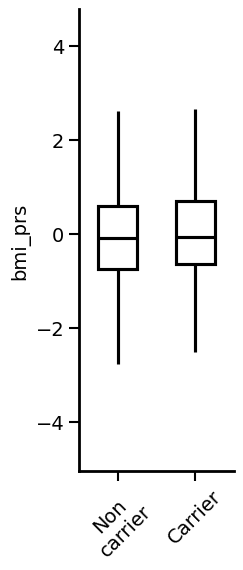

In [14]:
boxdf = cohort_df

# Define Canvas
fig,ax = plt.subplots(1, 1, figsize=(2, 6))

# Box Plot
# sns_strip = sns.stripplot(
#     data=boxdf,
#     palette=["#00ADEE", "#c1272d", ],  # '#D1245D', '#00ADEE', '#D1245D', '#00ADEE' "#0000a7"
#     x="vtype",
#     y="bmi",
#     order=["No combinations", "Combinations"],
#     hue_order=["No combinations", "Combinations"],
#     orient="v",
#     s=1,
#     marker="o",
#     # fillstyle="none",
#     alpha=0.5, ec='black', linewidth=0, facecolor=(0,0,0,0), dodge=False, ax=ax,  jitter=0.25, 
#     )

sns_box = sns.boxplot(
    data=boxdf,
    x="combo_carriers",
    y="bmi_prs",
    order=[False, True],
    hue_order=[False,True],
    dodge=False, width=0.5, linewidth=2.25, fliersize=0, capprops={'color':'none'}, boxprops={'facecolor':'none', 'edgecolor':'k'}, whiskerprops={'color':'k'}, medianprops={'color':'k'}) # 


# Adjust Axis
# ax.set_yticks([-0.02, 0, 0.02, 0.04])
# ax.set_ylim((10, 45))
# ax.set_ylabel('Percentage')
ax.set_xticklabels(["Non\ncarrier", "Carrier"], rotation=45, ha="center", fontsize=14)
ax.set_xlabel("")
# ax.hlines(42, 0, 1, color="k")
# ax.text(0.5, 43, f"P = {ttest_pval:.2E}", ha="center", va="bottom", fontsize=14)

# Remove Spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);

In [15]:
non_combo_hit_pheno.bmi_prs.dropna()

0        0.463350
1        0.023724
2       -2.497630
3        1.335380
4        0.563443
           ...   
59013    0.194420
59014   -0.639919
59015   -0.231208
59016    0.168653
59017   -1.798690
Name: bmi_prs, Length: 56293, dtype: float64

In [16]:
ttest_ind(non_combo_hit_pheno.bmi_prs.dropna(), combo_hit_pheno.bmi_prs.dropna(), alternative="less"), kstest(non_combo_hit_pheno.bmi_prs.dropna(), combo_hit_pheno.bmi_prs.dropna(), alternative="less")

(TtestResult(statistic=-1.5295728034153797, pvalue=0.06306404561879521, df=56628.0),
 KstestResult(statistic=0.01991988610249862, pvalue=0.7563796327029729, statistic_location=0.111794, statistic_sign=-1))